In [1]:
import sys
sys.path.insert(0, "/mnt/arquivos_linux/wile_C/Predictive_Maintenance_free_dataset/")
import torch
from matplotlib.pyplot import figure
from datasets import DatasetSinteticUnsupervisedLSTM

figure(figsize=(8, 6), dpi=80)

limiter = 2000

ABS_PATH = '/mnt/arquivos_linux/wile_C/Predictive_Maintenance_free_dataset'

test_dataset = DatasetSinteticUnsupervisedLSTM(dir_data=f'{ABS_PATH}/Datasets/sintetic_data/train_compressor_data.h5',
                                       context=400,
                                       stride=1)

test_loader = torch.utils.data.DataLoader(
                test_dataset, batch_size=1, shuffle=False
                )

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 44600/44600 [00:00<00:00, 1476657.76it/s]

len dataset:44600


<Figure size 640x480 with 0 Axes>

In [2]:
def union_vector_predicted_dict(data_predict:dict):
    
    x_concat = data_predict[0]
    
    del data_predict[0]
    
    keys_predicted = list(data_predict.keys())
    
    for key in keys_predicted:
        x_concat = torch.concat((x_concat, data_predict[key]), dim=1)
        
        del data_predict[key]
    
    return x_concat

In [3]:
data_predict = torch.load(f"../models_h5/generate_evaluate/sintetic_generate_data_LSTM.pt")

In [4]:
data_predict[0].shape

torch.Size([1, 1, 1])

In [5]:
vet_predict = union_vector_predicted_dict(data_predict)

In [6]:
vet_predict[0,400:,0]

tensor([0.0448, 0.0282, 0.0315,  ..., 4.2088, 4.0561, 3.9763])

## Concat Vets

In [7]:
# x_true, _ = test_loader.dataset[0]

# get_n_elements = len(test_loader.dataset)

# for i in range(1, get_n_elements):
    
#     x_second, _ = test_loader.dataset[i]
    
#     x_true = torch.concat((x_true, x_second), dim=0)
    
x_true = test_dataset.data

x_true.shape, vet_predict.shape

((45000, 1), torch.Size([1, 5400, 1]))

### First channel

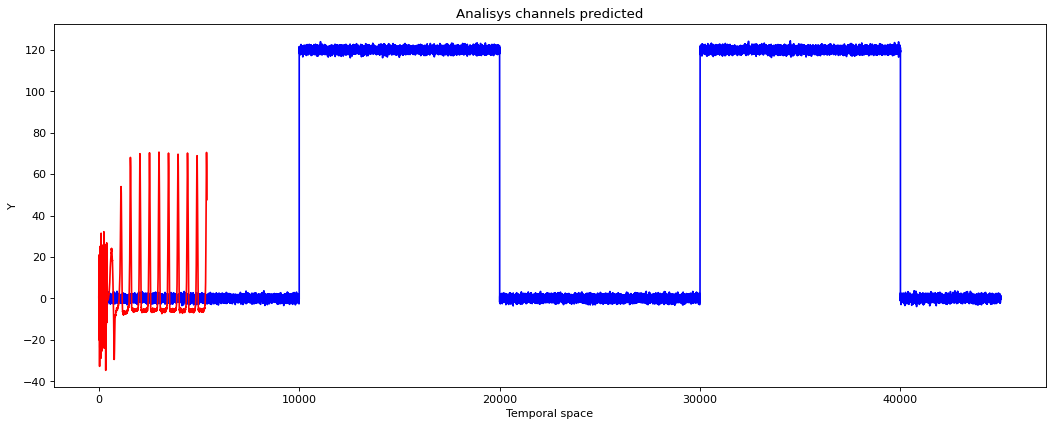

In [13]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(16, 6), dpi=80)
init_limiter = 0
limiter = init_limiter + 5400

#plt.plot(data_normal_train[:limiter,0])

#fig, axs = plt.subplots(1, 2, figsize=(15, 15))

feature_channel = 0
plt.xlabel('Temporal space')
plt.ylabel('Y')
plt.title("Analisys channels predicted")
# plt.plot(x_true[init_limiter:limiter, feature_channel], color='blue', label='sinal Real')
# plt.plot(vet_predict[0][init_limiter:limiter, feature_channel], color='r', label='sinal previsto')
# plt.plot(x_true, color='blue', label='sinal Real')
# plt.plot(12*vet_predict[0], color='r', label='sinal previsto')


In [9]:
abs(x_true[init_limiter:limiter, feature_channel] - vet_predict[0][init_limiter:limiter, feature_channel].numpy())[:100]

array([0.62368974, 1.74102972, 2.40097715, 1.6471578 , 0.83843358,
       0.68429209, 0.84880805, 0.38569815, 0.54143549, 2.4908048 ,
       0.08460772, 1.05319213, 0.96029863, 1.28132105, 1.52488249,
       0.84755964, 1.40659536, 0.7894495 , 1.59210258, 3.42856319,
       1.35815835, 0.08371765, 0.01725216, 0.43664797, 0.05287931,
       0.75085915, 1.01859499, 0.98697745, 0.2319038 , 2.42709505,
       0.12166025, 1.169221  , 0.80718164, 1.63886872, 0.54105935,
       0.58226918, 0.45979978, 0.52982211, 3.91479299, 1.9725231 ,
       1.4859849 , 1.78164134, 1.27928587, 0.05890006, 0.65390302,
       0.61540792, 0.08549843, 0.24891787, 0.90530843, 2.79060585,
       2.22817924, 0.57182603, 1.05585816, 2.00536505, 1.64445893,
       0.20353745, 0.20028437, 1.18285314, 1.77705434, 0.77326413,
       0.00603708, 0.50211949, 0.71365793, 1.27959014, 1.79735622,
       2.41592624, 3.25589979, 2.13601831, 1.53278311, 0.26337396,
       0.04157089, 0.0700942 , 1.02392786, 0.01160056, 0.21000

In [10]:
type(x_true[init_limiter:limiter, feature_channel])

numpy.ndarray